Machine Learning Assignemnt 2

Constantin von Krogh 13986767

Antoni Wonnka 14001128

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix as cm,precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import seaborn as sns
import numpy as np
svc = SVC()
from sklearn.tree import DecisionTreeClassifier
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.metrics import confusion_matrix
!pip install mglearn
from numpy.ma.core import masked_not_equal
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVC

# Part A

## 1.1

When transitioning to a multi-class classification task for wine quality prediction, we lose the inherent order in the data, as class labels are no longer indicative of a continuous scale. This can impact the model's ability to capture nuanced relationships between quality levels. However, a notable advantage is the increased flexibility to explore various classification models, potentially discovering superior performance compared to regression approaches. Also this allows for a broader exploration of algorithms tailored to categorical data.


In [107]:
desc = {"volatile acidity":float, "fixed acidity":float, "citric acid":float,
        "residual sugar": float, "chlorides": float, "total sulfur dioxide": float,
        "free sulfur dioxide": float, "density": float, "pH": float,
        "sulphates": float, "alcohol": float, "quality": int}

drive.mount('/content/drive', force_remount=True)
red = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 1/winequality-red.csv", sep=';', dtype=desc
                    )
white = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 1/winequality-white.csv", sep=';',dtype = desc)

Mounted at /content/drive


In [108]:
corr1 = red.corr()
corr1.style.background_gradient(cmap="coolwarm").set_precision(2)

<ipython-input-108-d145ca71a8ad>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr1.style.background_gradient(cmap="coolwarm").set_precision(2)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [109]:
def logistic_wine_regression(x: pd.DataFrame, y: pd.DataFrame, max_iter: int = 100,
random_state=0, test_size: float = 0.3):

    X_train,X_test,Y_train, Y_test = train_test_split(x,y,
                                              random_state = 0,
                                              test_size = test_size)
    model_log = LogisticRegression(max_iter=max_iter)
    model_log.fit(X_train,Y_train)
    pred_train = model_log.predict(X_train)
    pred_test = model_log.predict(X_test)

    score = model_log.score(X_test, Y_test)

    train_accuracy = model_log.score(X_train, Y_train)
    test_accuracy = model_log.score(X_test, Y_test)

    print("=-= Evaluation =-=")

    print('One-vs-rest', '-'*35,
      'Accuracy in Train Group   : {:.2f}'.format(train_accuracy),
      'Accuracy in Test  Group   : {:.2f}'.format(test_accuracy), sep='\n')


    print(classification_report(Y_test, pred_test, zero_division=0))
    print("Micro average precision score: {:.3f}".format (precision_score(Y_test, pred_test, average="micro", zero_division=0)))


    return model_log


In [110]:
X_columns = ["volatile acidity", "fixed acidity", "citric acid",
        "residual sugar", "chlorides", "total sulfur dioxide",
        "free sulfur dioxide" ,"density","pH",
        "sulphates", "alcohol"]


print("Red Wine Regression:")
red_r = logistic_wine_regression(x=red[X_columns], y=red['quality'], random_state=0, test_size=0.3, max_iter=5000)
print("\n \n")
print("White Wine Regression:")
white_r = logistic_wine_regression(x=white[X_columns], y=white['quality'], random_state=0, test_size=0.7, max_iter=3000)

Red Wine Regression:
=-= Evaluation =-=
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.59
Accuracy in Test  Group   : 0.62
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.67      0.77      0.72       208
           6       0.60      0.62      0.61       204
           7       0.42      0.31      0.36        45
           8       0.00      0.00      0.00         5

    accuracy                           0.62       480
   macro avg       0.28      0.28      0.28       480
weighted avg       0.59      0.62      0.60       480

Micro average precision score: 0.625

 

White Wine Regression:
=-= Evaluation =-=
One-vs-rest
-----------------------------------
Accuracy in Train Group   : 0.54
Accuracy in Test  Group   : 0.52
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        

## Part A 2.2 Data Preprocessing

In [111]:
drive.mount('/content/drive', force_remount=True)

bank_label = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 2/test_label.csv")
bank_label.set_index("ID")

bank_test = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 2/test.csv")

bank_test.set_index("ID")

bank_m_test = bank_test.merge(bank_label).copy()

bank_train = pd.read_csv("drive/MyDrive/Colab Notebooks/Machine Learning/Assignment 2/train.csv")


del bank_label, bank_test

Mounted at /content/drive


In [112]:
bank_train.tail(15)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
12855,20877,33,technician,single,tertiary,no,3689,no,no,cellular,27,aug,3,-1,0,unknown,yes
12856,13885,71,retired,married,primary,no,2988,no,no,telephone,17,apr,1,-1,0,unknown,yes
12857,17933,56,unemployed,single,primary,no,1110,no,no,cellular,4,feb,2,-1,0,unknown,yes
12858,18880,38,management,divorced,tertiary,no,162,no,no,cellular,25,aug,4,-1,0,unknown,no
12859,15724,31,management,single,tertiary,no,1675,no,no,cellular,2,sep,2,363,1,failure,no
12860,16765,34,entrepreneur,married,secondary,no,4659,yes,no,unknown,30,aug,1,-1,0,unknown,no
12861,13864,66,management,married,unknown,no,2149,yes,no,cellular,25,feb,1,87,10,failure,yes
12862,10583,27,management,single,primary,yes,13,no,no,cellular,30,jan,3,-1,0,unknown,yes
12863,18524,62,technician,married,secondary,no,135,yes,no,telephone,16,nov,13,96,1,other,no
12864,11293,50,admin.,divorced,secondary,no,3043,yes,no,unknown,3,jun,4,-1,0,unknown,no


In [113]:
print(bank_m_test["poutcome"].unique())
en_data = pd.get_dummies(data=bank_m_test, columns = ['default', 'month', 'housing', 'loan', 'job', 'marital', 'education', 'contact', 'poutcome'])
en = OneHotEncoder(handle_unknown='ignore')
en_data.head(10)

['success' 'unknown' 'failure' 'other']


,ID,age,balance,day,campaign,pdays,previous,y,default_no,default_yes,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,53608,32,12569,1,2,295,2,yes,1,0,...,0,1,0,1,0,0,0,0,1,0
1,51055,25,801,5,2,-1,0,yes,1,0,...,1,0,0,1,0,0,0,0,0,1
2,52573,46,1728,26,2,-1,0,no,1,0,...,1,0,0,0,0,1,0,0,0,1
3,50458,39,51,17,2,-1,0,no,1,0,...,1,0,0,0,0,1,0,0,0,1
4,52272,31,1626,31,1,-1,0,no,1,0,...,0,1,0,0,0,1,0,0,0,1
5,52072,34,806,19,3,458,1,yes,1,0,...,1,0,0,1,0,0,0,0,1,0
6,50973,24,805,5,2,-1,0,no,1,0,...,0,1,0,1,0,0,0,0,0,1
7,50553,37,3111,21,3,185,2,no,1,0,...,1,0,0,1,0,0,1,0,0,0
8,53135,34,425,16,7,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
9,53835,39,5574,14,2,-1,0,no,1,0,...,1,0,0,1,0,0,0,0,0,1


data well fitted

In [115]:
corr1 = bank_train.corr()
corr1.style.background_gradient(cmap="coolwarm").set_precision(2)

<ipython-input-115-db00a69398c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = bank_train.corr()
<ipython-input-115-db00a69398c5>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr1.style.background_gradient(cmap="coolwarm").set_precision(2)


,ID,age,balance,day,campaign,pdays,previous
ID,1.00,-0.02,-0.01,0.01,0.01,0.01,0.00
age,-0.02,1.00,0.10,-0.01,0.00,-0.00,0.02
balance,-0.01,0.10,1.00,0.00,-0.02,0.02,0.04
day,0.01,-0.01,0.00,1.00,0.15,-0.08,-0.05
campaign,0.01,0.00,-0.02,0.15,1.00,-0.10,-0.05
pdays,0.01,-0.00,0.02,-0.08,-0.10,1.00,0.52
previous,0.00,0.02,0.04,-0.05,-0.05,0.52,1.00


In [116]:
en_data1 = en_data.loc[:,en_data.columns != 'y']

minmax = MinMaxScaler()
print(minmax.fit(en_data1))
print(minmax.transform(en_data1))
en_data2 = minmax.transform(en_data1)
print(en_data2)

MinMaxScaler()
[[0.84102564 0.18421053 0.25515302 ... 0.         1.         0.        ]
 [0.24592075 0.09210526 0.06609366 ... 0.         0.         1.        ]
 [0.5997669  0.36842105 0.08098642 ... 0.         0.         1.        ]
 ...
 [0.93776224 0.28947368 0.09457788 ... 0.         0.         1.        ]
 [0.87995338 0.27631579 0.09285886 ... 1.         0.         0.        ]
 [0.45337995 0.36842105 0.05401237 ... 0.         0.         1.        ]]
[[0.84102564 0.18421053 0.25515302 ... 0.         1.         0.        ]
 [0.24592075 0.09210526 0.06609366 ... 0.         0.         1.        ]
 [0.5997669  0.36842105 0.08098642 ... 0.         0.         1.        ]
 ...
 [0.93776224 0.28947368 0.09457788 ... 0.         0.         1.        ]
 [0.87995338 0.27631579 0.09285886 ... 1.         0.         0.        ]
 [0.45337995 0.36842105 0.05401237 ... 0.         0.         1.        ]]


In [ ]:
plt.figure(figsize=(75,75))
sns.pairplot(data=en_data1, hue='y')
plt.show()

## 2.4 Models

### LinearSVC

In [118]:
#scaled

X_1= en_data.loc[:,en_data.columns != 'y']
Y_1 = en_data['y']
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1, random_state = 42,test_size = 0.3)



pipeline = Pipeline([('scale', StandardScaler()),
                   ('clf',LinearSVC(random_state=42))])
param_grid ={'clf__C':[0.01,0.1,1.0,10,100]}

grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(X_train,Y_train)

pipeline.fit(X_train, Y_train)
y_p = grid.predict(X_test)

In [119]:
y_p2 = grid.predict(X_test)
print(classification_report(Y_test,y_p2))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_p2, average="micro")))


              precision    recall  f1-score   support

          no       0.78      0.96      0.86       887
         yes       0.81      0.42      0.55       401

    accuracy                           0.79      1288
   macro avg       0.80      0.69      0.71      1288
weighted avg       0.79      0.79      0.76      1288

Micro average precision score: 0.788


Examining the confusion matrix reveals a rise in false positives (FP) but a significant decrease in true negatives (TN), indicating a higher frequency of model 'mistakes'. Higher accuracy is observed in scaled data compared to unscaled data, accompanied by an increased F1 score.  The graphical representation highlights that correct predictions of the positive class (TPs) contribute to an elevation in True Positive Rate (TPR), whereas false positives (FPs) result in an increase in False Positive Rate (FPR).

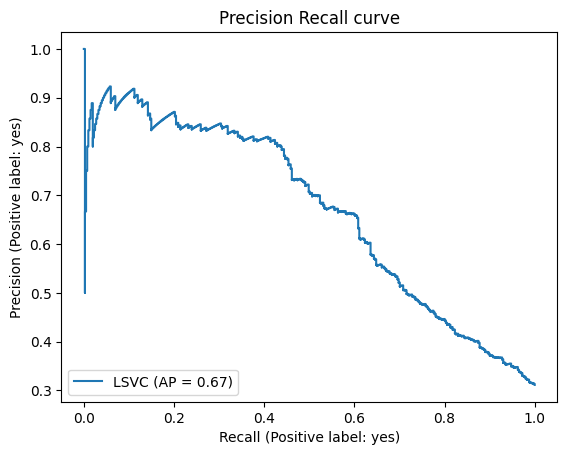

In [120]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
        grid, X_test, Y_test, name="LSVC")

_ = display.ax_.set_title("Precision Recall curve")

Best: 0.766561 using {'clf__C': 1.0}
0.766227 (0.008952) with: {'clf__C': 0.01}
0.766227 (0.009780) with: {'clf__C': 0.1}
0.766561 (0.009928) with: {'clf__C': 1.0}
0.736263 (0.018514) with: {'clf__C': 10}
0.652692 (0.025927) with: {'clf__C': 100}
Score = 0.79
Training set score: 0.7742257742257742
Test set score: 0.7880434782608695


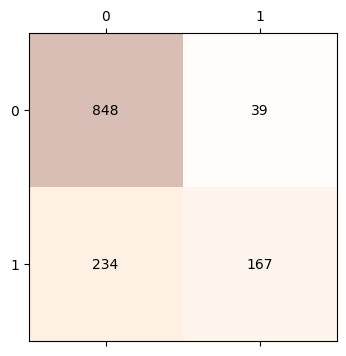

In [121]:
print("Best: %f using %s" % (grid.best_score_,
    grid.best_params_))
me1 = grid.cv_results_['mean_test_score']
st1 = grid.cv_results_['std_test_score']
p1 = grid.cv_results_['params']
for mean, stdev, param in zip(me1, st1, p1):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(grid.score(X_test,Y_test)))
print('Training set score: ' + str(grid.score(X_train,Y_train)))
print('Test set score: ' + str(grid.score(X_test,Y_test)))


cf_m = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cf_m, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cf_m.shape[0]):
    for j in range(cf_m.shape[1]):
        ax.text(x=j, y=i,s=cf_m[i, j], va='center', ha='center', size='medium')

In [122]:
pipeline1 = Pipeline([('clf',LinearSVC(random_state=42))])
param_grid1 ={'clf__C':[0.01,0.1,1.0,10,100]}

g2 = GridSearchCV(pipeline1, param_grid=param_grid1)
g2.fit(X_train,Y_train)

pipeline1.fit(X_train, Y_train)
y_pred1 = g2.predict(X_test)

Best: 0.539101 using {'clf__C': 0.01}
0.539101 (0.006792) with: {'clf__C': 0.01}
0.539101 (0.010488) with: {'clf__C': 0.1}
0.539101 (0.010488) with: {'clf__C': 1.0}
0.539101 (0.010488) with: {'clf__C': 10}
Score = 0.69
Training set score: 0.6933066933066933
Test set score: 0.687888198757764


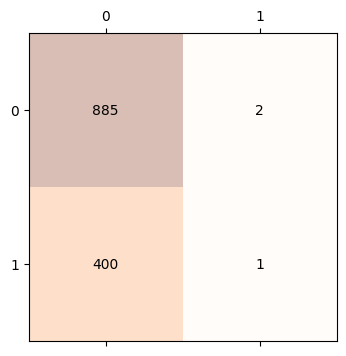

In [123]:
print("Best: %f using %s" % (g2.best_score_,
    g2.best_params_))
ms = g2.cv_results_['mean_test_score']
st = g2.cv_results_['std_test_score']
ps = g2.cv_results_['params']
for mean, stdev, param in zip(ms, stds, ps):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(g2.score(X_test,Y_test)))
print('Training set score: ' + str(g2.score(X_train,Y_train)))
print('Test set score: ' + str(g2.score(X_test,Y_test)))


conf_matrix = confusion_matrix(Y_test, y_pred1)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

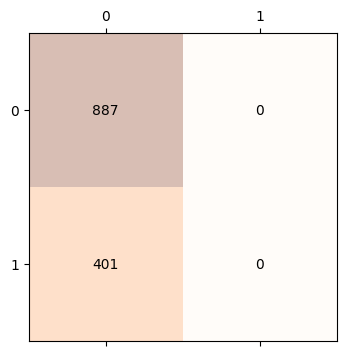

In [124]:
X_1= en_data.loc[:,en_data.columns != 'y']
Y_1 = en_data['y']
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1, random_state = 42,test_size = 0.3)

SVC = LinearSVC()
svc.fit(X_train,Y_train)
y_p = svc.predict(X_test)

cf_matrix = confusion_matrix(Y_test, y_p)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='medium')

In [125]:
y_p = grid2.predict(X_test)
print(classification_report(Y_test,y_p))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_p, average="micro")))

              precision    recall  f1-score   support

          no       0.69      1.00      0.81       887
         yes       0.33      0.00      0.00       401

    accuracy                           0.69      1288
   macro avg       0.51      0.50      0.41      1288
weighted avg       0.58      0.69      0.56      1288

Micro average precision score: 0.688


 Larger values of C enhance optimization, ensuring accurate classification of training points and consequently improving accuracy. Conversely, smaller C values lead to more misclassifications, decreasing accuracy. The comparison between StandardScaler and MinMaxScaler reveals nearly identical results, evident from the confusion matrix plot. The matrix, specifically constructed for the raw LinearSVC model, demonstrates an expected outcome, highlighting subtle differences. The implementation of feature scaling has contributed to an overall enhancement in model performance.


### 2.4 b)
Logistic Regression

SC Model

In [126]:
pipeline3 = Pipeline([('scale', StandardScaler()),
                   ('clf',LogisticRegression())])
param_grid ={'clf__C':[0.001,0.1,1.0,3.0]}

log_reg = GridSearchCV(pipeline3, cv=3, param_grid=param_grid)
log_reg.fit(X_train,Y_train)
y_pred4 = log_reg.predict(X_test)

In [127]:
print("Best: %f using %s" % (log_reg.best_score_,
    log_reg.best_params_))
me4 = log_reg.cv_results_['mean_test_score']
stds4 = log_reg.cv_results_['std_test_score']
params4 = log_reg.cv_results_['params']
for mean, stdev, param in zip(me4, stds4, params4):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(log_reg.score(X_test,Y_test)))
print('Training set score: ' + str(log_reg.score(X_train,Y_train)))
print('Test set score: ' + str(log_reg.score(X_test,Y_test)))

print(classification_report(Y_test,y_pred4))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred4, average="micro")))


Best: 0.769231 using {'clf__C': 0.1}
0.740593 (0.008490) with: {'clf__C': 0.001}
0.769231 (0.010604) with: {'clf__C': 0.1}
0.769231 (0.010220) with: {'clf__C': 1.0}
0.769231 (0.010220) with: {'clf__C': 3.0}
Score = 0.78
Training set score: 0.7768897768897769
Test set score: 0.7849378881987578
              precision    recall  f1-score   support

          no       0.79      0.95      0.86       887
         yes       0.78      0.43      0.55       401

    accuracy                           0.78      1288
   macro avg       0.78      0.69      0.71      1288
weighted avg       0.78      0.78      0.76      1288

Micro average precision score: 0.785


Unscaled model

In [128]:
pipelineUM = Pipeline([('clf',LogisticRegression())])
param_grid ={'clf__C':[0.001,0.1,1.0,3.0]}

log_reg = GridSearchCV(pipelineUM, cv=3, param_grid=param_grid)
log_reg.fit(X_train,Y_train)
y_p5 = log_reg.predict(X_test)

In [129]:
print("Best: %f using %s" % (log_reg.best_score_,
    log_reg.best_params_))
means = log_reg.cv_results_['mean_test_score']
stds = log_reg.cv_results_['std_test_score']
params = log_reg.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(log_reg.score(X_test,Y_test)))
print('Training set score: ' + str(log_reg.score(X_train,Y_train)))
print('Test set score: ' + str(log_reg.score(X_test,Y_test)))

print(classification_report(Y_test,y_p5))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_p5, average="micro")))

Best: 0.691642 using {'clf__C': 0.001}
0.691642 (0.006792) with: {'clf__C': 0.001}
0.688978 (0.010488) with: {'clf__C': 0.1}
0.688978 (0.010488) with: {'clf__C': 1.0}
0.688978 (0.010488) with: {'clf__C': 3.0}
Score = 0.69
Training set score: 0.6933066933066933
Test set score: 0.6909937888198758
              precision    recall  f1-score   support

          no       0.70      0.98      0.81       887
         yes       0.53      0.06      0.11       401

    accuracy                           0.69      1288
   macro avg       0.62      0.52      0.46      1288
weighted avg       0.65      0.69      0.59      1288

Micro average precision score: 0.691


When C takes on small values, heightened regularization strength leads to the creation of simple models prone to underfitting the data. Conversely, larger C values reduce regularization strength, allowing the model to increase complexity and potentially overfit the data. The incorporation of feature scaling has played a crucial role in enhancing the overall performance of the model.

### KNN


In [130]:
n_splits = 5

pipeline = GridSearchCV(
    Pipeline([
            ('normalize', StandardScaler()),
            ('knn', KNeighborsClassifier())
    ]),
    {'knn__n_neighbors': list(range(1, 50)), 'knn__weights': ['uniform', 'distance']},
    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
)

print(end='Hyperparameter tuning for the KNN classifier ')
pipeline.fit(X_train, Y_train)

results = pipeline.cv_results_
best_comb = np.argmax(results['mean_test_score'])
best_params = results['params'][best_comb]

print('Best parameter combination:')
print('weights={}, n_neighbors={}'.format(best_params['knn__weights'],
                                          best_params['knn__n_neighbors']))

results

Hyperparameter tuning for the KNN classifier Best parameter combination:
weights=uniform, n_neighbors=15


{'mean_fit_time': array([0.01173072, 0.01231632, 0.01203809, 0.01401448, 0.01097441,
        0.01194558, 0.01103225, 0.01279697, 0.01038766, 0.01124988,
        0.01072612, 0.01164036, 0.01117325, 0.01151118, 0.01109219,
        0.01320066, 0.01078439, 0.01424923, 0.01568584, 0.01950884,
        0.01770263, 0.02573924, 0.01770859, 0.02166405, 0.018468  ,
        0.01565027, 0.01113863, 0.01218104, 0.01163235, 0.01273236,
        0.01093287, 0.01240697, 0.01074953, 0.01373782, 0.01089649,
        0.01186147, 0.01102276, 0.01277599, 0.01119595, 0.01151781,
        0.01045461, 0.01347942, 0.01140122, 0.0121192 , 0.01158819,
        0.01352401, 0.01102185, 0.01152864, 0.01099219, 0.01503139,
        0.01104717, 0.01201477, 0.01108961, 0.01263309, 0.0122088 ,
        0.01204977, 0.01137156, 0.01254373, 0.0108602 , 0.01145701,
        0.01127286, 0.01303487, 0.01088457, 0.0207119 , 0.01759605,
        0.02671304, 0.01717958, 0.01714182, 0.01952481, 0.01977248,
        0.01625876, 0.01884818,

In [131]:
y_pred5 = pipeline.predict(X_test)
print(classification_report(Y_test,y_pred5))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred5, average="micro")))

              precision    recall  f1-score   support

          no       0.78      0.94      0.85       887
         yes       0.76      0.43      0.55       401

    accuracy                           0.78      1288
   macro avg       0.77      0.68      0.70      1288
weighted avg       0.78      0.78      0.76      1288

Micro average precision score: 0.780


In [132]:
#unscaled

n_splits = 5

pipeline = GridSearchCV(
    Pipeline([('knn', KNeighborsClassifier())]),
    {'knn__n_neighbors': list(range(1, 50)), 'knn__weights': ['uniform', 'distance']},
    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
)

print(end='Hyperparameter tuning for the KNN classifier ')
pipeline.fit(X_train, Y_train)

results = pipeline.cv_results_
best_comb = np.argmax(results['mean_test_score'])
best_params = results['params'][best_comb]

print('Best parameter combination:')
print('weights={}, n_neighbors={}'.format(best_params['knn__weights'],
                                          best_params['knn__n_neighbors']))

results

Hyperparameter tuning for the KNN classifier Best parameter combination:
weights=uniform, n_neighbors=38


{'mean_fit_time': array([0.00966802, 0.0110673 , 0.0104351 , 0.0110486 , 0.01122947,
        0.01026435, 0.01112456, 0.01753416, 0.01117406, 0.01430526,
        0.01345911, 0.01648374, 0.01351514, 0.02022882, 0.01178536,
        0.01919351, 0.01242576, 0.01957955, 0.01404605, 0.00981383,
        0.00986919, 0.01006103, 0.01125712, 0.01013355, 0.01920376,
        0.01370764, 0.01075139, 0.01081586, 0.00968161, 0.01014886,
        0.01098809, 0.01115994, 0.01039529, 0.01027646, 0.01021819,
        0.01094217, 0.0103395 , 0.00984592, 0.00990925, 0.01170444,
        0.01003556, 0.01454163, 0.01057372, 0.01834574, 0.01010547,
        0.02122111, 0.01391072, 0.01870294, 0.01493983, 0.01947079,
        0.01338301, 0.01088095, 0.01556864, 0.01065893, 0.01076913,
        0.01037736, 0.01037021, 0.00972457, 0.01045179, 0.01177864,
        0.01012325, 0.01187053, 0.01006393, 0.01002932, 0.00984235,
        0.00979686, 0.01005406, 0.01001539, 0.01030703, 0.01164618,
        0.01033735, 0.00982141,

In [133]:
y_pred5 = pipeline.predict(X_test)
print(classification_report(Y_test,y_pred5))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test, y_pred5, average="micro")))

              precision    recall  f1-score   support

          no       0.69      0.98      0.81       887
         yes       0.42      0.02      0.05       401

    accuracy                           0.69      1288
   macro avg       0.55      0.50      0.43      1288
weighted avg       0.61      0.69      0.57      1288

Micro average precision score: 0.686


The scaled model attains optimal performance with K=15, achieving a test accuracy of 78%. Reducing the value of K leads to a decline in test accuracy due to the model closely fitting the training data. Conversely, larger K values result in a too generalized model, failing to enhance test accuracy. Notably, the incorporation of feature scaling has played a pivotal role in improving the overall performance of the model.

# Part B

##Decision Tree Classsifier


In our prediction attempts, the accuracy stands at 68%. Interestingly, adjusting the prediction quantity within the range of 5-1000 yields a negligible impact on outcomes, showing a variation of less than 1%.

In [134]:
de_tree = DecisionTreeClassifier(random_state=42)
de_tree.fit(X_train, Y_train)
predictions = de_tree.predict(X_test)

In [135]:
print(classification_report(Y_test, predictions,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predictions, average="micro")))

              precision    recall  f1-score   support

          no       0.78      0.76      0.77       887
         yes       0.49      0.52      0.51       401

    accuracy                           0.68      1288
   macro avg       0.63      0.64      0.64      1288
weighted avg       0.69      0.68      0.69      1288

Micro average precision score: 0.683


In the initial confusion matrix, the counts of false positives (FP), false negatives (FN), and true negatives (TN) are quite similar. However, after tuning the model, there is a noticeable reduction in the count of false positives, indicating an improvement in the model's performance.

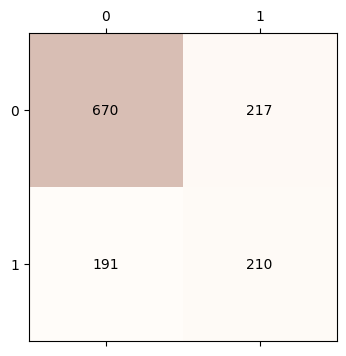

In [136]:
cf_m = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(cf_m, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(cf_m.shape[0]):
    for j in range(cf_m.shape[1]):
        ax.text(x=j, y=i,s=cf_m[i, j], va='center', ha='center', size='medium')

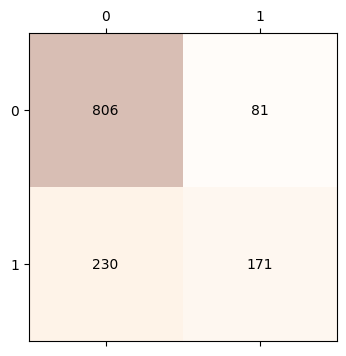

In [152]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [1,2,3,4,5,6,7,8,9,10], 'max_features': [1,5,10,15,20,25,30,35,40,45,50]}


dectree = DecisionTreeClassifier(random_state=42)
dectree.fit(X_train, Y_train)
predictions = dectree.predict(X_test)

grid_dtree = GridSearchCV(dectree,param_grid = params,return_train_score=True)
grid_dtree.fit(X_train,Y_train)
predictions1 = grid_dtree.predict(X_test)
conf_matrix = confusion_matrix(Y_test, predictions1)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='medium')

In [138]:
print(classification_report(Y_test, predictions1,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predictions1, average="micro")))

              precision    recall  f1-score   support

          no       0.78      0.91      0.84       887
         yes       0.68      0.43      0.52       401

    accuracy                           0.76      1288
   macro avg       0.73      0.67      0.68      1288
weighted avg       0.75      0.76      0.74      1288

Micro average precision score: 0.759


In [153]:
print("Best: %f using %s" % (grid_dtree.best_score_,
    grid_dtree.best_params_))
means = grid_dtree.cv_results_['mean_test_score']
stds = grid_dtree.cv_results_['std_test_score']
params = grid_dtree.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Score = %3.2f" %(grid_dtree.score(X_test,Y_test)))
print('Training set score: ' + str(grid_dtree.score(X_train,Y_train)))
print('Test set score: ' + str(grid_dtree.score(X_test,Y_test)))

Best: 0.754582 using {'max_depth': 7, 'max_features': 30}
0.707626 (0.005629) with: {'max_depth': 1, 'max_features': 1}
0.693307 (0.000608) with: {'max_depth': 1, 'max_features': 5}
0.693307 (0.000608) with: {'max_depth': 1, 'max_features': 10}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 15}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 20}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 25}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 30}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 35}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 40}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 45}
0.741256 (0.007592) with: {'max_depth': 1, 'max_features': 50}
0.705627 (0.005323) with: {'max_depth': 2, 'max_features': 1}
0.700300 (0.005020) with: {'max_depth': 2, 'max_features': 5}
0.693307 (0.000608) with: {'max_depth': 2, 'max_features': 10}
0.743590 (0.005024) with: {'max_depth': 2, 'max_features': 15}
0

<Axes: xlabel='param_max_depth'>

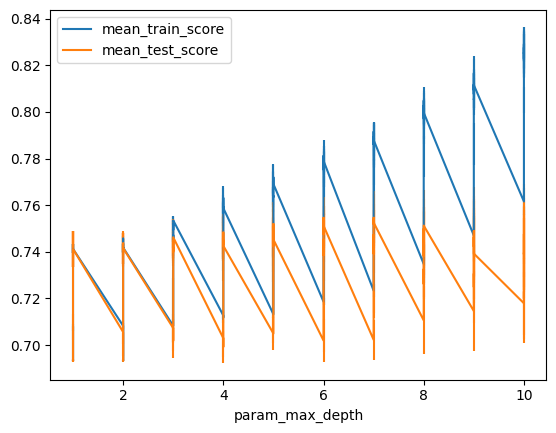

In [144]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
scores = pd.DataFrame(grid_dtree.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

Adjusting the maximum depth of the tree doesn't substantially impact the test score. The optimal depth is found at 7, and even at a depth of 3, the test score only slightly decreases by about 0.001. Increasing the maximum depth provides marginal benefits for the test score but raises the risk of overfitting. Thus, maintaining a lower maximum depth is advisable to balance test score preservation and mitigate overfitting.

In [141]:
from sklearn import linear_model
classifier = linear_model.RidgeClassifier(alpha=0.1)
classifier.fit(X_1, Y_1.map({"yes":1,"no":0}))
print(classifier.intercept_)
classifier.get_params(deep=True)
print(classifier.coef_)

[-0.61421419]
[[ 5.34114018e-06  5.91846233e-04  8.94213619e-06  1.63370407e-03
  -2.21214071e-02  4.07787291e-04  1.99590170e-03  3.64242894e-02
  -3.64242894e-02  3.46070428e-02 -3.14969008e-01  1.42216205e-01
  -1.20109440e-01 -3.43717764e-01 -2.64737460e-01  2.80967498e-02
   5.10515472e-01 -1.09615795e-01 -3.11786583e-01  3.98311847e-01
   3.51188733e-01  8.95488237e-02 -8.95488237e-02  6.03285117e-02
  -6.03285117e-02  5.63734726e-02  1.52994129e-02 -8.76162238e-02
  -5.58542986e-02 -3.93645898e-02  1.38769048e-01  1.41616589e-03
  -6.12288372e-02  1.32936802e-01 -1.87490109e-02  2.11131054e-02
  -1.03095047e-01 -1.09452610e-02 -4.22606139e-02  5.32058748e-02
  -6.21790725e-02  3.05757524e-03  8.83667069e-02 -2.92452096e-02
   2.01084620e-01  5.67613006e-02 -2.57845920e-01 -3.41628686e-01
  -1.61131727e-01  6.59777915e-01 -1.57017503e-01]]


##Random Forest Classifier

The initial cell conducts a GridSearchCV to identify optimal parameters. To streamline grading and avoid a lengthy 3-hour run, we execute GridSearchCV with pre-determined tuned parameters. Notably, the best parameters are: max_depth=20, max_features=20, n_estimators=250, as highlighted below.

In [143]:
from sklearn.ensemble import RandomForestClassifier
RFp = {'max_depth':range(1,100),'max_features': [ 1,2,5,10,25,30],'n_estimators':[1,100,200,300]}
rtr1 = RandomForestClassifier(random_state=42)
rtr1.fit(X_train,Y_train)
predi2 = rtr1.predict(X_test)
grid_rtr1 = GridSearchCV(rtr1,param_grid=RFp,return_train_score=True)
grid_rtr1.fit(X_train,Y_train)

print(grid_rtr1.best_params_)
print(grid_rtr1.best_score_)
print(classification_report(Y_test, predi2,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predi2, average="micro")))

KeyboardInterrupt: ignored

In [147]:
params3 = {'max_depth':[20],'max_features': [20],'n_estimators':[250]}
rtr2 = RandomForestClassifier(random_state=42)
rtr2.fit(X_train,Y_train)
predi3 = rtr2.predict(X_test)
grid_rtr2 = GridSearchCV(rtr2,param_grid=params3,return_train_score=True)
grid_rtr2.fit(X_train,Y_train)
print(grid_rtr2.best_params_)
print(classification_report(Y_test, predi3,))
print("Micro average precision score: {:.3f}".format (precision_score(Y_test,predi3, average="micro")))

{'max_depth': 20, 'max_features': 20, 'n_estimators': 250}
              precision    recall  f1-score   support

          no       0.81      0.92      0.86       887
         yes       0.75      0.53      0.62       401

    accuracy                           0.80      1288
   macro avg       0.78      0.72      0.74      1288
weighted avg       0.79      0.80      0.79      1288

Micro average precision score: 0.798


In [148]:
from sklearn.metrics import roc_curve, roc_auc_score
Y1 = bank_m_test['y']
Y1 = Y1.map({'yes': 1, 'no': 0})
X_1= en_data.loc[:,en_data.columns != 'y']
Y_1 = Y1
X_train,X_test,Y_train,Y_test = train_test_split(X_1,Y_1, random_state = 42,test_size = 0.3)
y_score1 = rtr2.predict_proba(X_test)[:,1]
y_score2 = grid_rtr2.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test, y_score2)

In [ ]:
Y1

On the plot, smaller x-axis values signify fewer false positives and more true negatives. Conversely, larger y-axis values indicate increased true positives and reduced false negatives.

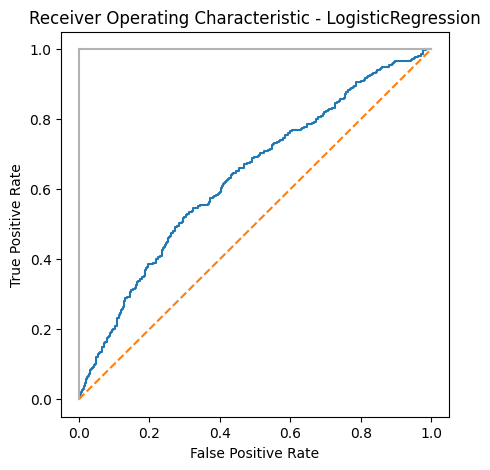

In [149]:
y_score1 = log_reg.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - LogisticRegression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

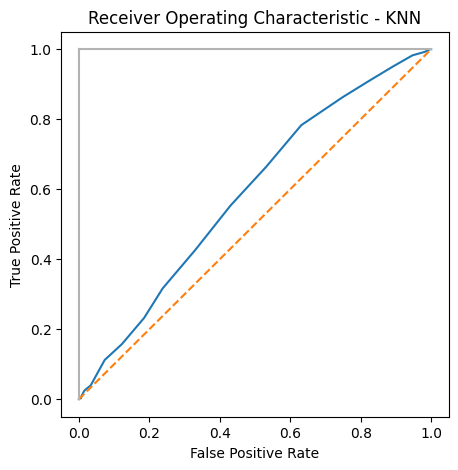

In [150]:
y_score1 = pipeline.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

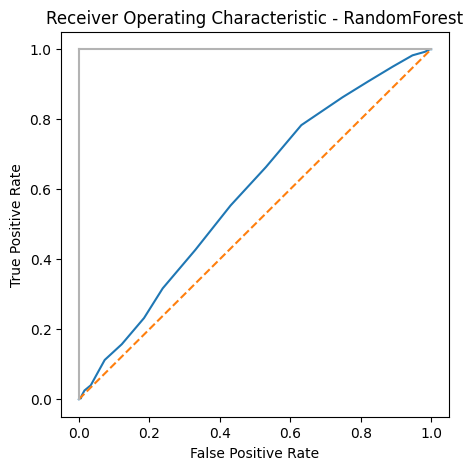

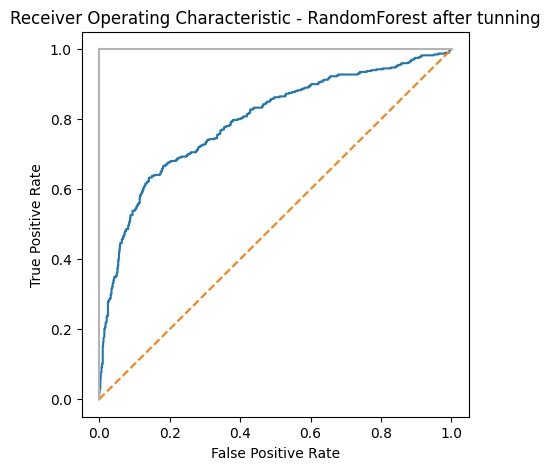

In [151]:
plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - RandomForest after tunning')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()